# Лабораторная работа 6 Покотило Дмитрий ПИН-201

### Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.



Установим библиотеку cufflinks

In [1]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


Подключение библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()




Читаем в переменную rests файл с информацией о приложениях в Google Play

In [3]:
apps  = pd.read_csv('Desktop.csv', sep=',',nrows= 500)



In [4]:
apps.set_index('Number')

,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
Number,,,,,,,,,,,,,,
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3,19000.0,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,14000.0,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0,0.0,Everyone,Art & Design,1.2.4,4.0.3,8.7,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0,0.0,Teen,Art & Design,NaN,4.2,25000.0,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4,2.8,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,WannaMeet – Dating & Chat App,DATING,4.1,6701,1000000,0,0.0,Mature 17+,Dating,5.16.2,4.0.3,11000.0,6,2018
531,Luxy Pro- Elite Dating Single,DATING,3.9,742,50000,0,0.0,Mature 17+,Dating,5.3.3.13289,4.0.3,26000.0,4,2018
532,Dating Network,DATING,4.0,187,10000,0,0.0,Mature 17+,Dating,1.17,4.2,19000.0,7,2018


### Результат "визуального" анализа:
    -Number: номер приложения. (числовой)
    -app: Название приложения. (строковый)
    -category: Категория. (строковый)
    -rating: Рейтинг. (число с плавающей точкой)
    -reviews: количество отзывов. (числовой)
    -installs: количество установок. (числовой)
    -type price: тип цены: платный или бесплатный. 0 - бесплатный (бинарный)
    -price: цена. (число с плавающей точкой)
    -content_rating: на кого ориентирован. (строковый) 
    -genres: жанры. (строковый)  
    -current_ver: текущая версия. (строковый)
    -android_ver: текущая версия андроида. (строковый)
    -size(kb): размер в Кб. (число с плавающей точкой)
    -update_month: месяц обновления. (дата)	
    -update_year: год обновления. (дата)

## 1 Matplotlib
### 1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

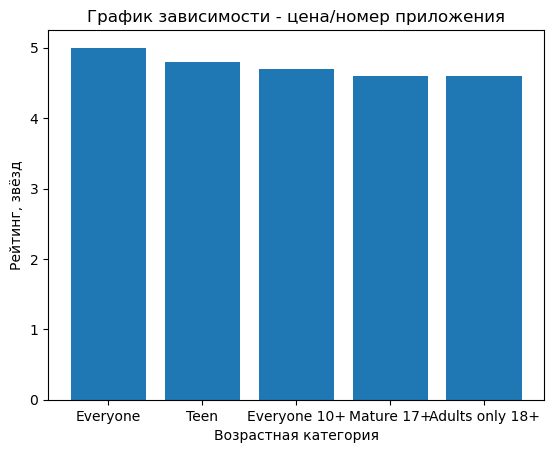

In [5]:
price = plt.bar(apps['content_rating'], apps['rating'])
price = plt.xlabel('Возрастная категория')
price = plt.ylabel('Рейтинг, звёзд')
price = plt.title('График зависимости - цена/номер приложения')

### 1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом. Хотя бы в одном графике подпишите оси. Во всех графиках подписать название графика.

Text(42.597222222222214, 0.5, 'Рейтинг, звёзд')

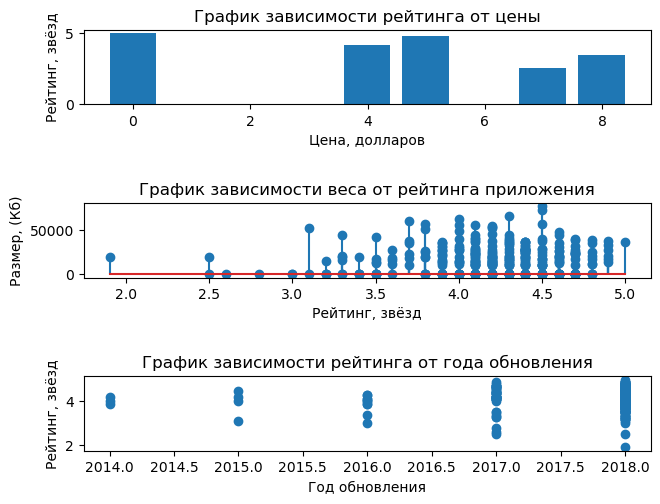

In [6]:
figure, axis = plt.subplots(3, 1)
figure.tight_layout(h_pad=5 )
axis[0].bar(apps['price'],apps['rating'])
axis[0].set_title("График зависимости рейтинга от цены")
axis[0].set_xlabel('Цена, долларов')
axis[0].set_ylabel('Рейтинг, звёзд')

axis[1].stem(apps['rating'],apps['size(kb)'])
axis[1].set_title('График зависимости веса от рейтинга приложения')
axis[1].set_xlabel('Рейтинг, звёзд')
axis[1].set_ylabel('Размер, (Кб)')


axis[2].scatter(apps['update_year'],apps['rating'])
axis[2].set_title('График зависимости рейтинга от года обновления')
axis[2].set_xlabel('Год обновления')
axis[2].set_ylabel('Рейтинг, звёзд')



### 2 На основе Вашего датасета построить три разных вида графиков используя pandas.
DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

#### Создадим boxplot для исследования рейтинга и месяца аптдейта приложения, сгруппировав данные по году 

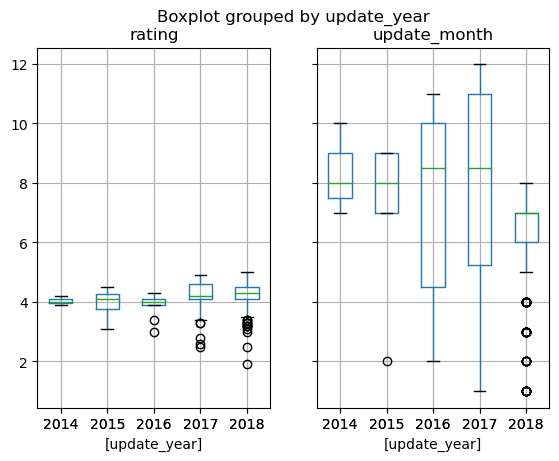

In [7]:
dfForBoxplot = apps[['update_month','rating','update_year']].copy()
bp = dfForBoxplot.boxplot(by='update_year')


#### Создадим Series, построим гистограмму частот размеров приложений
xlabel="Вес, Кб", ylabel="Частота" не применимы к гистограммам

<Axes: ylabel='Frequency'>

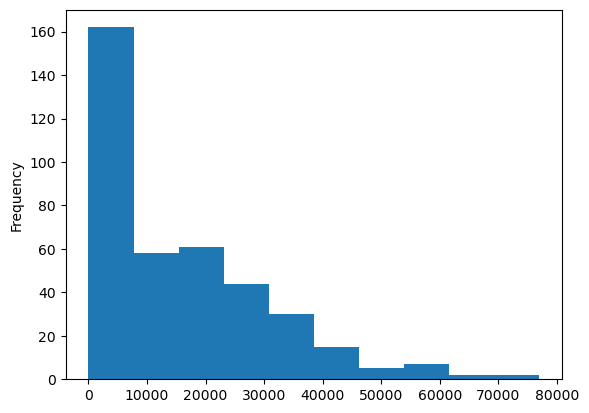

In [8]:
apps['size(kb)'].plot(kind='hist')

#### Создадим Series, построим график плотности распределения обновлений приложений по годам

<Axes: ylabel='Density'>

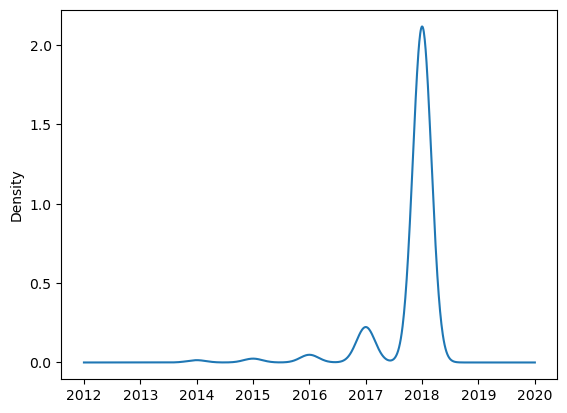

In [9]:
apps['update_year'].plot(kind='density')

### 3 Seaborn
#### 3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

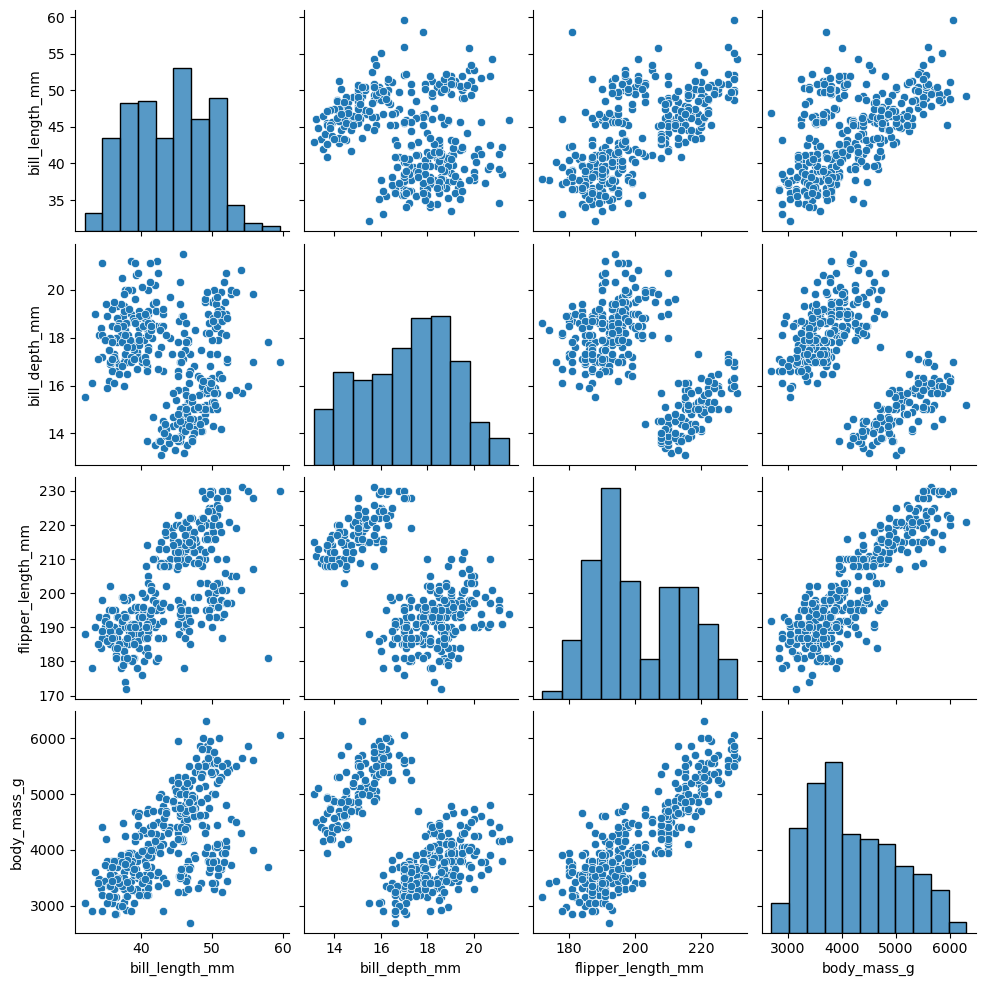

In [10]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

#### С помощью данных графиков можно увидеть зависимости отношений для каждой пары переменных

#### 3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

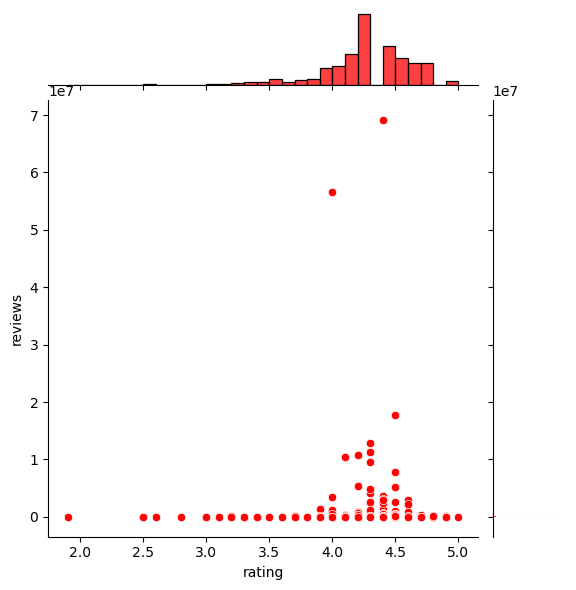

In [11]:
appsJoin = sns.jointplot(x=apps.rating, y=apps.reviews, color='r', )

#### На этом графике видно, что наибольшее количество отзывов у приложений с рейтингом 4,5.

#### 3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

<Axes: xlabel='bill_length_mm', ylabel='sex'>

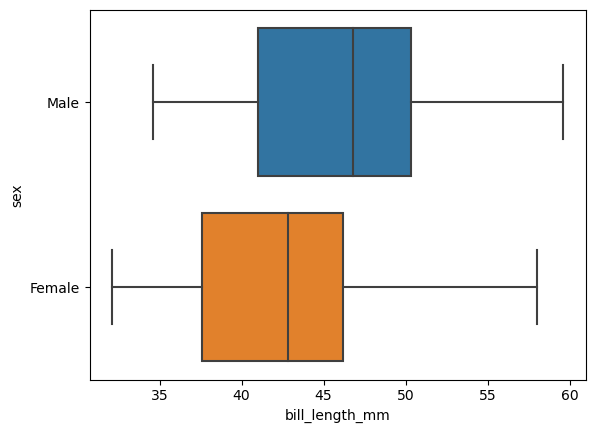

In [12]:
sns.boxplot(data=penguins, x="bill_length_mm", y="sex")

#### На этом графике видно, что у самок пингвинов длина клюва в среднем меньше, чем у самцов

### 3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

<Axes: >

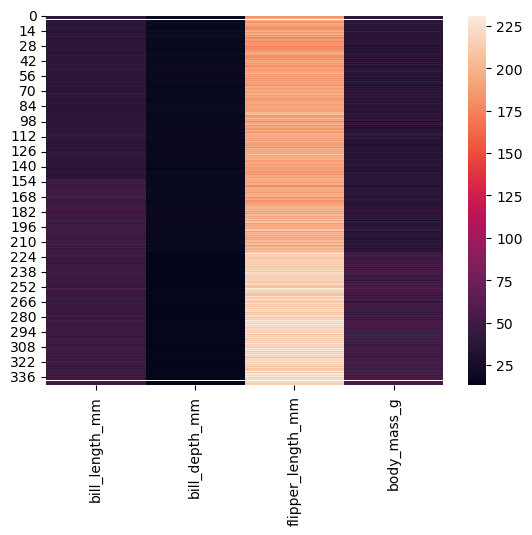

In [13]:
penguins_cleaning = penguins.select_dtypes(include='float64')
penguins_cleaning.dropna()
penguins_cleaning['body_mass_g'] = penguins_cleaning['body_mass_g']/100
sns.heatmap(penguins_cleaning)


Привели значения массы к кг для более наглядного изображения

### 5 Построить любой график (связанный с вашими данными) с помощью plotly

In [14]:
apps['rating'].iplot(kind='hist', xTitle='Рейтинг', yTitle='Число', title='Распределение рейтинга')